In [223]:
# Importing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder

import glob
import time

In [224]:
start_time = time.time()
useful_cols = ['WAGP','SEX', 'AGEP','RAC1P','RAC3P','SCHL', 'WKW','WKHP','OCCP','POWSP','ST']
path = r'data'
PUS_full = pd.concat([pd.read_csv(f, usecols = useful_cols) for f in glob.glob(path + "/**/*.csv", recursive = True)], ignore_index=True)
print (PUS_full.shape)
print(" %s min" % round(((time.time() - start_time)/60),2))

(22086506, 11)
 2.08 min


In [225]:
PUS_full.columns

Index(['ST', 'AGEP', 'SCHL', 'SEX', 'WAGP', 'WKHP', 'WKW', 'OCCP', 'POWSP',
       'RAC1P', 'RAC3P'],
      dtype='object')

In [226]:
PUS_full.describe(include='all')

,ST,AGEP,SCHL,SEX,WAGP,WKHP,WKW,OCCP,POWSP,RAC1P,RAC3P
count,2.208651e+07,2.208651e+07,2.141281e+07,2.208651e+07,1.884864e+07,1.284955e+07,1.131076e+07,1.300724e+07,9.905305e+06,2.208651e+07,2.208651e+07
mean,2.766371e+01,4.101152e+01,1.596921e+01,1.511390e+00,2.655740e+04,3.347395e+01,1.889818e+00,4.307224e+03,2.799476e+01,1.886041e+00,2.807043e+00
std,1.605613e+01,2.359286e+01,5.641746e+00,4.998703e-01,5.008751e+04,1.755698e+01,1.625324e+00,2.627313e+03,1.773814e+01,2.096391e+00,6.650154e+00
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.200000e+01,2.000000e+01,1.400000e+01,1.000000e+00,0.000000e+00,2.400000e+01,1.000000e+00,2.310000e+03,1.200000e+01,1.000000e+00,1.000000e+00
50%,2.700000e+01,4.200000e+01,1.700000e+01,2.000000e+00,5.000000e+03,4.000000e+01,1.000000e+00,4.250000e+03,2.700000e+01,1.000000e+00,1.000000e+00
75%,4.200000e+01,6.000000e+01,2.000000e+01,2.000000e+00,3.800000e+04,4.000000e+01,2.000000e+00,5.700000e+03,4.200000e+01,1.000000e+00,1.000000e+00
max,5.600000e+01,9.700000e+01,2.400000e+01,2.000000e+00,7.360000e+05,9.900000e+01,6.000000e+00,9.920000e+03,5.550000e+02,9.000000e+00,1.000000e+02


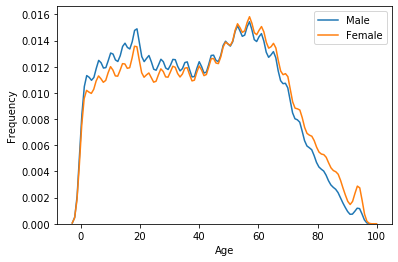

In [227]:
g = sns.kdeplot(PUS_full["AGEP"][(PUS_full["SEX"] == 1) & (PUS_full["AGEP"].notnull())])
g = sns.kdeplot(PUS_full["AGEP"][(PUS_full["SEX"] == 2) & (PUS_full["AGEP"].notnull())])
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g=g.legend(["Male","Female"])

Text(0, 0.5, 'Frequency')

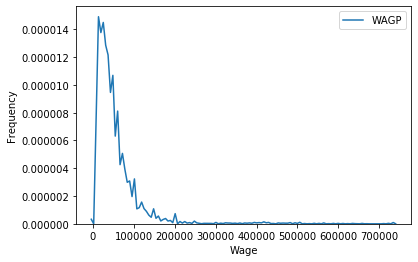

In [228]:
g = sns.kdeplot(PUS_full["WAGP"][(PUS_full["WAGP"] > 0) & (PUS_full["AGEP"] > 18)])
g.set_xlabel("Wage")
g.set_ylabel("Frequency")

#### Full-Time Detection

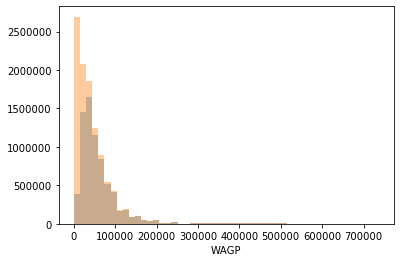

In [229]:
g = sns.distplot(PUS_full["WAGP"][(PUS_full["WAGP"] > 0) & (PUS_full["WKW"] < 4) & (PUS_full["WKHP"]  >= 35)], kde=False)
g = sns.distplot(PUS_full["WAGP"][(PUS_full["WAGP"] > 0)], kde=False)

In [230]:
# define function to seperate people who've worked more than 40 weeks / year
def full_time_detect(df):
    # remove rows of people who work under 40 weeks in a year
    df['WKW'] = df['WKW'].map(lambda y: 1 if y < 4
                              else 0)
    df = df.loc[df.WKW != 0].copy()

    # remove rows of people who work under 35 hours a week
    df['WKHP'] = df['WKHP'].map(lambda y: 1 if y >= 35
                                else 0)
    df = df.loc[df.WKHP != 0].copy()
    return df

In [231]:
ft_test = PUS_full.copy()
ft_test = full_time_detect(ft_test)
print(ft_test.shape)
ft_test.describe()

(7594840, 11)


,ST,AGEP,SCHL,SEX,WAGP,WKHP,WKW,OCCP,POWSP,RAC1P,RAC3P
count,7.594840e+06,7.594840e+06,7.594840e+06,7.594840e+06,7.594840e+06,7594840.0,7594840.0,7.594840e+06,7.337694e+06,7.594840e+06,7.594840e+06
mean,2.794256e+01,4.436281e+01,1.876222e+01,1.433889e+00,5.893903e+04,1.0,1.0,4.065474e+03,2.809378e+01,1.814268e+00,2.556938e+00
std,1.600316e+01,1.301355e+01,3.270105e+00,4.956102e-01,6.340276e+04,0.0,0.0,2.738896e+03,1.783847e+01,2.000425e+00,5.899657e+00
min,1.000000e+00,1.600000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.0,1.0,1.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.200000e+01,3.400000e+01,1.600000e+01,1.000000e+00,2.600000e+04,1.0,1.0,1.760000e+03,1.200000e+01,1.000000e+00,1.000000e+00
50%,2.800000e+01,4.500000e+01,1.900000e+01,1.000000e+00,4.400000e+04,1.0,1.0,4.130000e+03,2.800000e+01,1.000000e+00,1.000000e+00
75%,4.200000e+01,5.500000e+01,2.100000e+01,2.000000e+00,7.000000e+04,1.0,1.0,5.740000e+03,4.200000e+01,1.000000e+00,1.000000e+00
max,5.600000e+01,9.600000e+01,2.400000e+01,2.000000e+00,7.360000e+05,1.0,1.0,9.830000e+03,5.550000e+02,9.000000e+00,1.000000e+02


## Outlier Testing

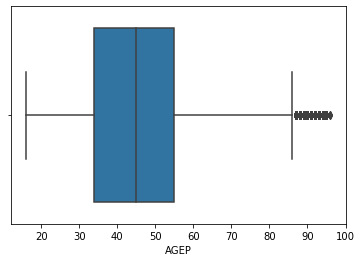

In [232]:
ax = sns.boxplot(x=ft_test["AGEP"])

In [233]:
test_age_IQR = np.percentile(ft_test.AGEP, 75) - np.percentile(ft_test.AGEP, 25) 
test_age_upper = np.percentile(ft_test.AGEP, 75) + test_age_IQR*3
test_age_lower = np.percentile(ft_test.AGEP, 25) - test_age_IQR*3
print ("AGE IQR: " , test_age_IQR," Upper: " , test_age_upper ," Lower: " , test_age_lower)

AGE IQR:  21.0  Upper:  118.0  Lower:  -29.0


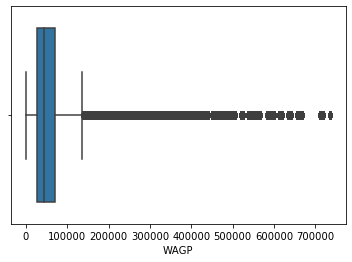

In [234]:
ax = sns.boxplot(x=ft_test["WAGP"])

In [235]:
test_wage_IQR = np.percentile(ft_test.WAGP, 75) - np.percentile(ft_test.WAGP, 25) 
test_wage_upper = np.percentile(ft_test.WAGP, 75) + test_wage_IQR*3
test_wage_lower = np.percentile(ft_test.WAGP, 25) - test_wage_IQR*3
print ("Wage IQR: " , test_wage_IQR," Upper: " , test_wage_upper ," Lower: " , test_wage_lower)

Wage IQR:  44000.0  Upper:  202000.0  Lower:  -106000.0


In [236]:
def outlier_remove(df):
    wage_IQR = np.percentile(df.WAGP, 75) - np.percentile(df.WAGP, 25) 
    wage_upper = np.percentile(df.WAGP, 75) + wage_IQR*3
    wage_lower = np.percentile(df.WAGP, 25) - wage_IQR*3
    
    age_IQR = np.percentile(df.AGEP, 75) - np.percentile(df.AGEP, 25) 
    age_upper = np.percentile(df.AGEP, 75) + age_IQR*3
    age_lower = np.percentile(df.AGEP, 25) - age_IQR*3
    
    df = df.loc[df.WAGP >= 12500].copy()
    df = df.loc[df.WAGP <= wage_upper].copy()
    df = df.loc[df.AGEP >= 18].copy()
    df = df.loc[df.AGEP <= 70].copy()
    
    return df

In [237]:
outlier_test = ft_test.copy()
outlier_test = outlier_remove(outlier_test)
print(outlier_test.shape)

(6705569, 11)


[(12500, 250000)]

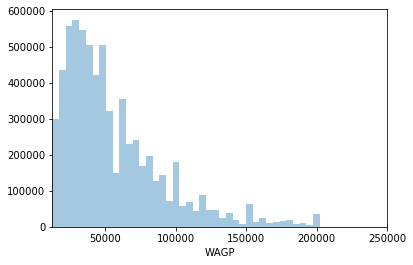

In [238]:
ax = sns.distplot(outlier_test["WAGP"], bins=40, kde=False)
ax.set(xlim=(12500, 250000))

##### Age Bins

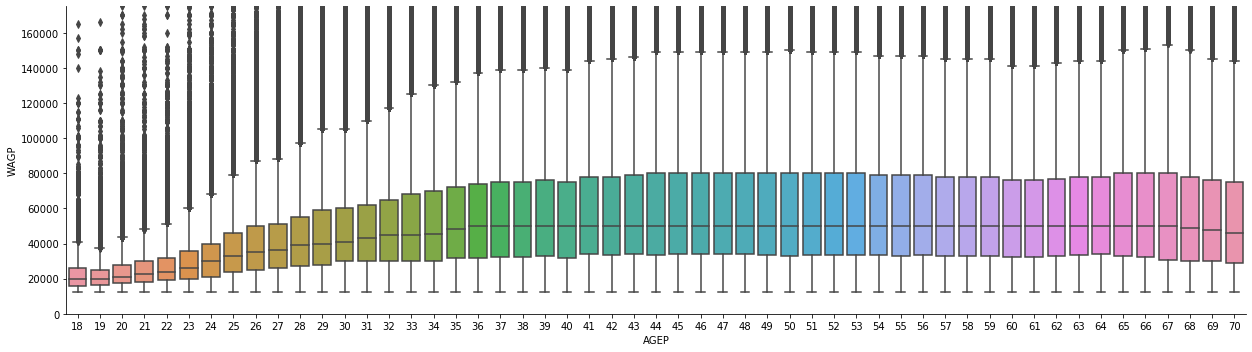

In [239]:
g = sns.catplot(y="WAGP", x="AGEP", data=outlier_test, kind="box", aspect = 3.5)
g.set(ylim=(0, 175000))

In [240]:
def age_bins(df):
    df['AGEB'] = df['AGEP'].map(lambda y: 1 if y <= 25 #18-25
                                else 2 if y <= 35 #26-35
                                else 3 if y <= 45 #36-45
                                else 4 if y <= 60 #46-60
                                else 5 if y <= 70 #60-70
                                else 6) #+70
    return df

In [241]:
age_test = outlier_test.copy()
age_test.sort_values(by=['AGEP'], ascending=True, inplace=True)

In [242]:
age_bins(age_test)
print("Age :", age_test.AGEB.unique())

Age : [1 2 3 4 5]


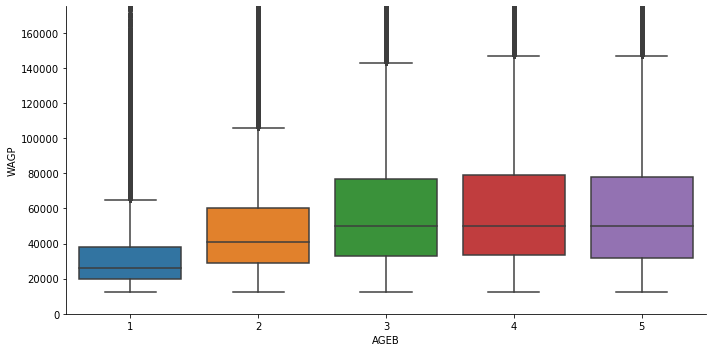

In [243]:
g = sns.catplot(y="WAGP", x="AGEB", data=age_test, kind="box", aspect = 2)
g.set(ylim=(0, 175000))

In [244]:
age_test['AGEB'].value_counts()

4    2527076
3    1525095
2    1498244
5     640725
1     514429
Name: AGEB, dtype: int64

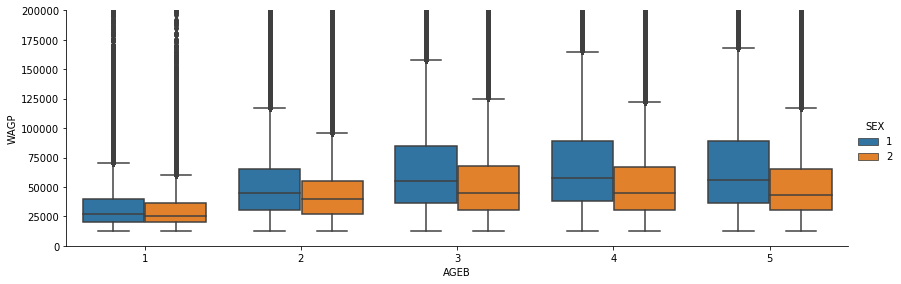

In [245]:
g = sns.catplot(y="WAGP", x="AGEB", data=age_test, kind="box", height = 4, aspect = 3, hue = "SEX")
g.set(ylim=(0, 200000))

#### Education Split
- NH: No High-school Degree
- HS: Highschool Diploma (or GED)
- SC: Some College
- AS: Associate's degree
- BS: Bachelor's degree
- GD: Graduate Degree
- DR: Doctorate Degree

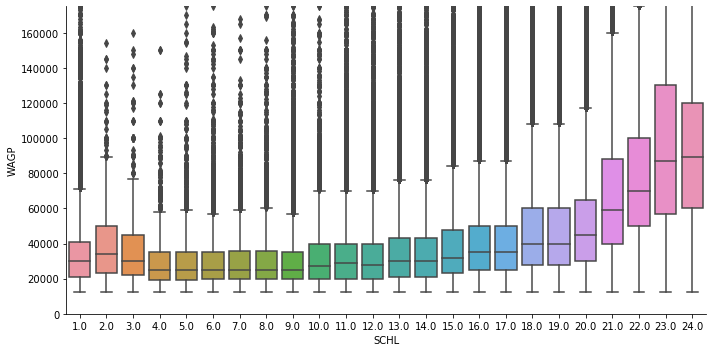

In [246]:
g = sns.catplot(y="WAGP", x="SCHL", data=age_test, kind="box", aspect = 2)
g.set(ylim=(0, 175000))

In [247]:
def edu_split(df):
    #split into degrees
    df['EDU'] = df['SCHL'].map(lambda y: 1 if y <=15 #didn't finish HS
                               else 1 if y <= 17 #HS degree
                                else 2 if y <= 19 #some college
                               else 2 if y == 20 #AS
                               else 3 if y == 21 #BS
                                else 4 if y == 22 #MS
                                else 5) #GS
    return df

In [248]:
edu_test = age_test.copy()
edu_test = edu_split(edu_test)
print("Edu :", edu_test.EDU.unique())

Edu : [1 2 3 4 5]


In [249]:
edu_sort = edu_test.groupby('EDU').median().sort_values(by=['WAGP']).reset_index()
edu_list = edu_sort['EDU'].tolist()

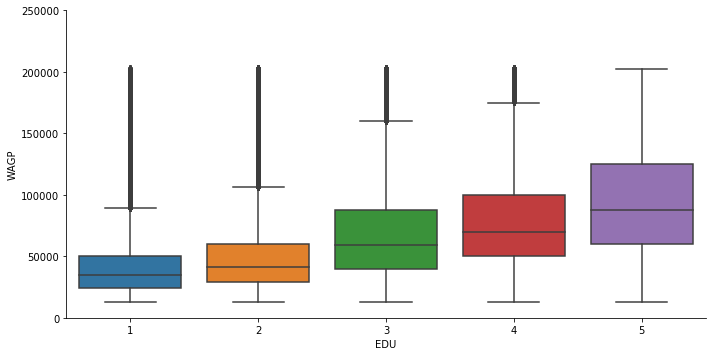

In [250]:
g = sns.catplot(y="WAGP", x="EDU", data=edu_test, kind="box", aspect = 2, order = edu_list)
g.set(ylim=(0, 250000))

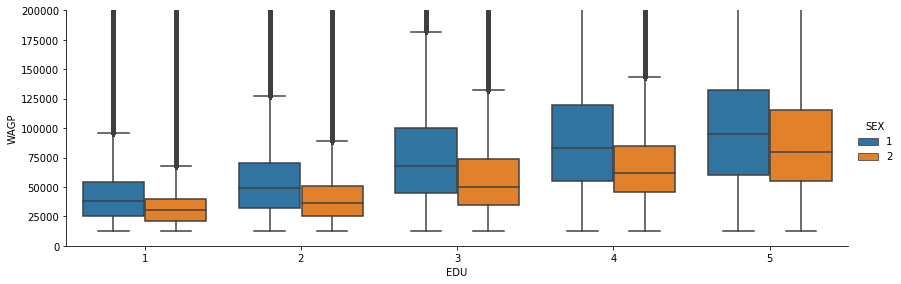

In [251]:
g = sns.catplot(y="WAGP", x="EDU", data=edu_test, kind="box", height = 4, aspect = 3, hue = "SEX", order = edu_list)
g.set(ylim=(0, 200000))

In [252]:
edu_test['EDU'].value_counts()

2    2105010
1    2023484
3    1605912
4     713544
5     257619
Name: EDU, dtype: int64

#### Occupation Split
- 0010-0960: Management, Business, and Financial Occupations
- 1005-1980: Computer, Engineering, and Science Occupations
- 2001-2970: Education, Legal, Community Service, Arts, and Media Occupations
- 3000-3550: Healthcare Practitioners and Technical Occupations
- 3601-4655: Service Occupations
- 4700-5940: Sales and Office Occupations
- 6005-7640: Natural Resources, Construction, and Maintenance Occupations
- 7700-8990: Production Occupations
- 9005-9760: Transportation and Material Moving Occupations
- 9800-9830: Military Specific Occupations

In [253]:
def int_occ_split(df):
    # split into occupational industries
    df['JOB'] = df['OCCP'].map(lambda y: "Business" if y <= 960
                                else "Science" if y <= 1980
                                else "Arts" if y <= 2970
                                else "Healthcare" if y <= 3550
                                else "Service" if y <= 4655
                                else "Sales" if y <= 5940
                                else "Maintenance" if y <= 7640
                                else "Production" if y <= 8990
                                else "Transportation" if y <= 9760
                                else "Military" if y <= 9830
                                else "UN")
    return df

In [254]:
int_occ_test = edu_test.copy()
int_occ_test = int_occ_split(int_occ_test)
print("Occ :", int_occ_test.JOB.unique())

Occ : ['Service' 'Maintenance' 'Transportation' 'Military' 'Sales' 'Production'
 'Science' 'Business' 'Arts' 'Healthcare']


In [255]:
int_occ_sort = int_occ_test.groupby('JOB').median().sort_values(by=['WAGP']).reset_index()
int_occ_list = int_occ_sort['JOB'].tolist()

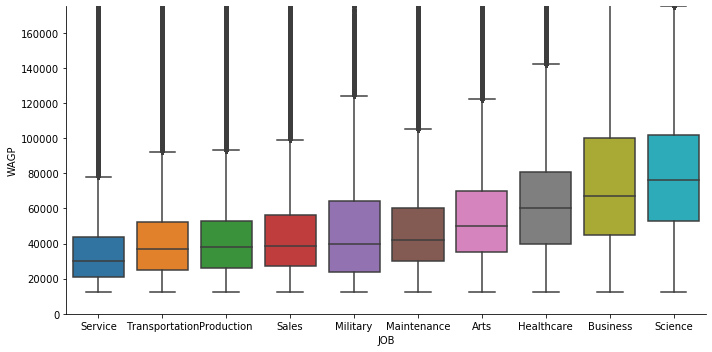

In [256]:
g = sns.catplot(y="WAGP", x="JOB", data=int_occ_test, kind="box", aspect = 2, order = int_occ_list)
g.set(ylim=(0, 175000))

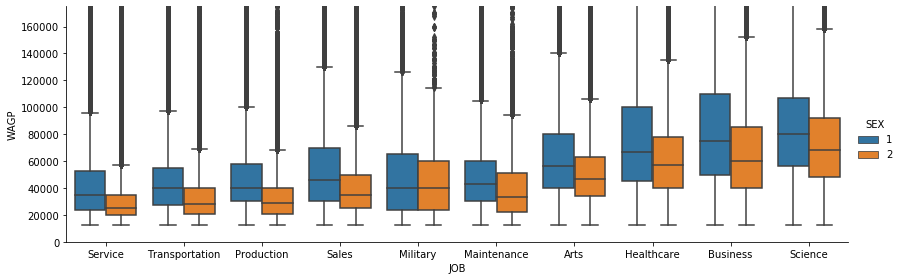

In [257]:
g = sns.catplot(y="WAGP", x="JOB", data=int_occ_test, kind="box", height = 4, aspect = 3, hue = "SEX", order = int_occ_list)
g.set(ylim=(0, 175000))

In [258]:
int_occ_test['JOB'].value_counts()

Sales             1478942
Business          1222290
Service            788615
Arts               758765
Maintenance        632603
Science            491828
Production         470567
Healthcare         417040
Transportation     412350
Military            32569
Name: JOB, dtype: int64

In [259]:
def occ_split(df):
    # split into occupational industries
    df['JOB'] = df['OCCP'].map(lambda y: 1 if y <= 960 #Business
                                else 1 if y <= 1980 #Science
                                else 2 if y <= 2970 #Arts
                                else 1 if y <= 3550 # Healthcare
                                else 5 if y <= 4655 #Service
                                else 4 if y <= 5940 #Sales
                                else 2 if y <= 7640 #Maintenance
                                else 5 if y <= 8990 #Production
                                else 5 if y <= 9760 #Transportation
                                else 2 if y <= 9830 #Military
                                else 6) #Undefined
    return df

In [260]:
occ_test = edu_test.copy()
occ_test = occ_split(occ_test)
print("Occ :", occ_test.JOB.unique())

Occ : [5 2 4 1]


In [261]:
occ_test['JOB'].value_counts()

1    2131158
5    1671532
4    1478942
2    1423937
Name: JOB, dtype: int64

In [262]:
occ_sort = occ_test.groupby('JOB').median().sort_values(by=['WAGP']).reset_index()
occ_list = occ_sort['JOB'].tolist()

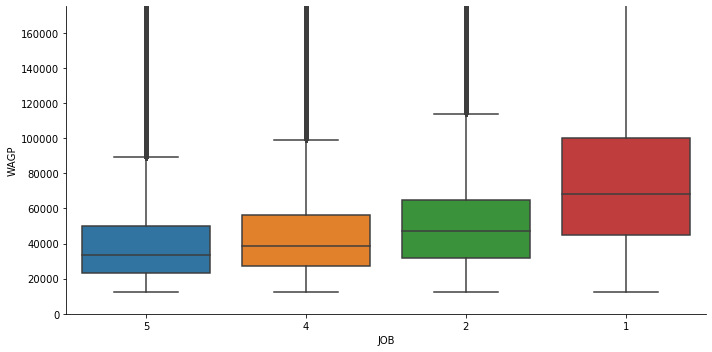

In [263]:
g = sns.catplot(y="WAGP", x="JOB", data=occ_test, kind="box", aspect = 2, order = occ_list)
g.set(ylim=(0, 175000))

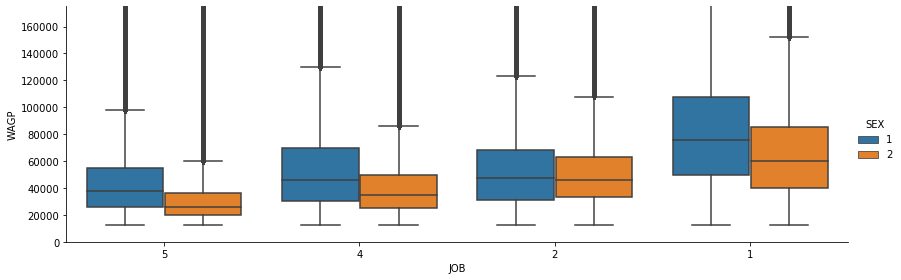

In [264]:
g = sns.catplot(y="WAGP", x="JOB", data=occ_test, kind="box", height = 4, aspect = 3, hue = "SEX", order = occ_list)
g.set(ylim=(0, 175000))

#### State - POWSP

In [269]:
int_state_sort = occ_test.groupby('POWSP').median().reset_index()
int_state_sort['reg_code'] = ['3', '4', '4', '3', '4', '4', '1', '3', '3', '3',
                              '3', '4', '4', '2', '2', '2', '2', '3', '3', '1',
                              '3', '1', '2', '2', '3', '2', '4', '2', '4', '1',
                              '1', '4', '1', '3', '2', '2', '3', '4', '1', '1',
                              '3', '2', '3', '3', '4', '1', '3', '4', '3', '2',
                              '4', '5', '5', '5', '5', '5', '5', '5', '5']
int_state_sort = int_state_sort.sort_values(by=['WAGP'])
int_state_list = int_state_sort['POWSP'].tolist()

In [270]:
reg_sort = int_state_sort.sort_values(by=['reg_code'])
reg_list = reg_sort['POWSP'].tolist()

In [292]:
ST_list = reg_sort['ST'].tolist()
print(ST_list)

[50.0, 25.0, 9.0, 34.0, 36.0, 42.0, 44.0, 23.0, 33.0, 38.0, 55.0, 31.0, 27.0, 19.0, 20.0, 18.0, 26.0, 29.0, 46.0, 17.0, 39.0, 10.0, 51.0, 24.0, 48.0, 24.0, 28.0, 13.0, 5.0, 40.0, 1.0, 54.0, 45.0, 21.0, 12.0, 47.0, 22.0, 37.0, 56.0, 4.0, 35.0, 32.0, 49.0, 30.0, 15.0, 8.0, 16.0, 6.0, 41.0, 2.0, 53.0, 48.0, 25.0, 12.0, 24.0, 17.0, 27.0, 25.0, 30.5]


In [276]:
print(reg_list)

[50.0, 25.0, 9.0, 34.0, 36.0, 42.0, 44.0, 23.0, 33.0, 38.0, 55.0, 31.0, 27.0, 19.0, 20.0, 18.0, 26.0, 29.0, 46.0, 17.0, 39.0, 10.0, 51.0, 24.0, 48.0, 11.0, 28.0, 13.0, 5.0, 40.0, 1.0, 54.0, 45.0, 21.0, 12.0, 47.0, 22.0, 37.0, 56.0, 4.0, 35.0, 32.0, 49.0, 30.0, 15.0, 8.0, 16.0, 6.0, 41.0, 2.0, 53.0, 303.0, 166.0, 72.0, 251.0, 399.0, 301.0, 555.0, 254.0]


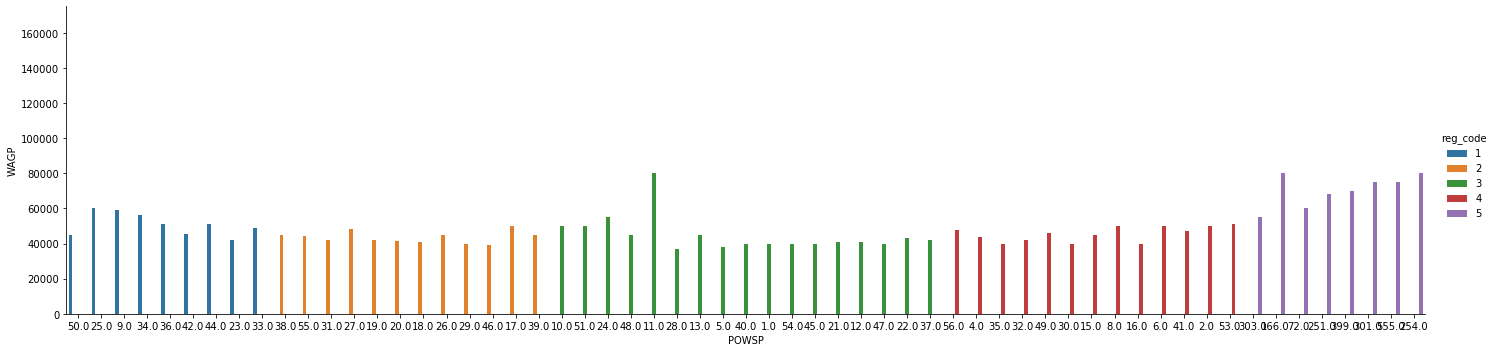

In [271]:
g = sns.catplot(y="WAGP", x="POWSP", hue = 'reg_code', data=reg_sort, kind="bar", aspect = 4, order = reg_list)
g.set(ylim=(0, 175000))

In [278]:
int_state_sort.groupby('reg_code').median()

,POWSP,ST,AGEP,SCHL,SEX,WAGP,WKHP,WKW,OCCP,RAC1P,RAC3P,AGEB,EDU,JOB
reg_code,,,,,,,,,,,,,,
1,34.0,34.0,46.0,20.0,1.0,51000.0,1.0,1.0,3850.00,1.0,1.0,4.0,2.0,2.0
2,28.0,28.0,45.0,19.0,1.0,43150.0,1.0,1.0,4660.00,1.0,1.0,3.0,2.0,2.0
3,24.0,24.0,44.0,19.0,1.0,41000.0,1.0,1.0,4230.00,1.0,1.0,3.0,2.0,2.0
4,30.0,30.0,44.0,19.0,1.0,46000.0,1.0,1.0,4220.00,1.0,1.0,3.0,2.0,2.0
5,277.5,25.0,47.5,21.0,1.0,72500.0,1.0,1.0,2621.25,1.0,1.0,4.0,3.0,2.0


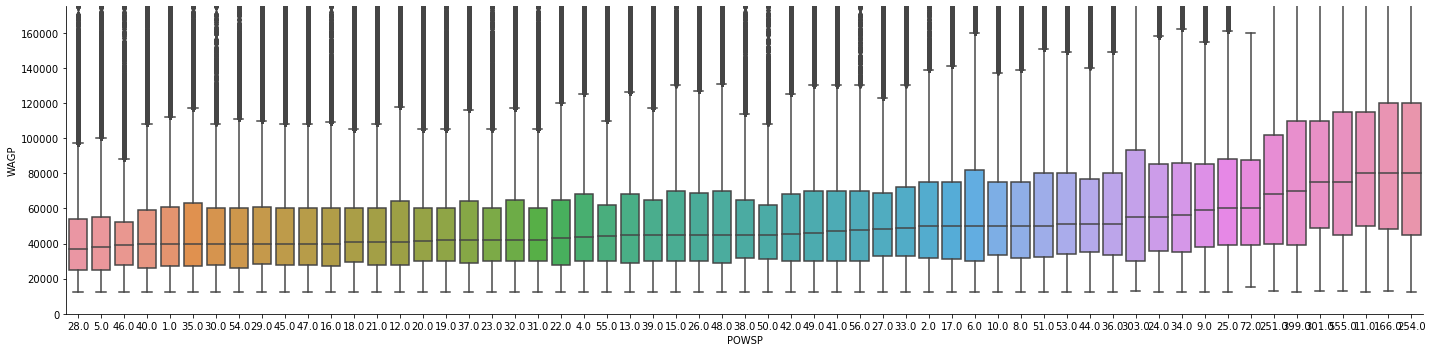

In [272]:
g = sns.catplot(y="WAGP", x="POWSP", data=occ_test, kind="box", aspect = 4, order = int_state_list)
g.set(ylim=(0, 175000))

In [275]:
print (int_state_list)

[28.0, 5.0, 46.0, 40.0, 1.0, 35.0, 30.0, 54.0, 29.0, 45.0, 47.0, 16.0, 18.0, 21.0, 12.0, 20.0, 19.0, 37.0, 23.0, 32.0, 31.0, 22.0, 4.0, 55.0, 13.0, 39.0, 15.0, 26.0, 48.0, 38.0, 50.0, 42.0, 49.0, 41.0, 56.0, 27.0, 33.0, 2.0, 17.0, 6.0, 10.0, 8.0, 51.0, 53.0, 44.0, 36.0, 303.0, 24.0, 34.0, 9.0, 25.0, 72.0, 251.0, 399.0, 301.0, 555.0, 11.0, 166.0, 254.0]


In [295]:
def state_split(df):
    # split into higher paying states
    df['STSP'] = df['POWSP'].map(lambda y: 1 if y in [17.0, 8.0, 10.0, 51.0, 53.0, 44.0, 36.0, 303.0, 34.0, 24.0, 72.0, 25.0, 9.0, 251.0, 399.0, 301.0, 555.0, 11.0, 166.0, 254.0]
                                 else 2 if y in [50.0, 55.0, 15.0, 38.0, 42.0, 49.0, 41.0, 56.0, 27.0, 33.0, 2.0,6.0]
                                 else 3 if y in [23.0, 21.0, 20.0, 19.0, 22.0, 39.0, 26.0, 4.0,13.0, 48.0, ]
                                 else 4 if y in [28.0, 5.0, 30.0, 45.0, 40.0, 47.0, 54.0, 16.0, 46.0, 1.0, 29.0, 35.0, 18.0, 12.0, 31.0,32.0, 37.0, ]
                                 else 5)
    test = df.loc[df['STSP'] == 5].copy()
    df = df.loc[df['STSP'] != 5]
    test['STSP'] = test['ST'].map(lambda y: 1 if y in [50, 25.0, 9.0, 34.0, 36.0, 42.0, 44.0, 23.0, 33.0,303.0, 166.0, 72.0, 251.0, 399.0, 301.0, 555.0, 254.0]
                                      else 2 if y in [56.0, 4.0, 35.0, 32.0, 49.0, 30.0, 15.0, 8.0, 16.0, 6.0, 41.0, 2.0, 53.0]
                                      else 3 if y in [38.0, 55.0, 31.0, 27.0, 19.0, 20.0, 18.0, 26.0, 29.0, 46.0, 17.0, 39.0]
                                      else 4 if y in [10.0, 51.0, 24.0, 48.0, 11.0, 28.0, 13.0, 5.0, 40.0, 1.0, 54.0, 45.0, 21.0, 12.0, 47.0, 22.0, 37.0]
                                      else 10)
    df = pd.concat([df, test])

    return df

In [296]:
state_test = occ_test.copy()
state_test = state_split(state_test)
print("State :", state_test.STSP.unique())
state_test['STSP'].value_counts()

State : [3 4 1 2]


1    1813402
3    1681095
4    1660652
2    1550420
Name: STSP, dtype: int64

In [297]:
state_sort = state_test.groupby('STSP').median().sort_values(by=['WAGP']).reset_index()
state_list = state_sort['STSP'].tolist()

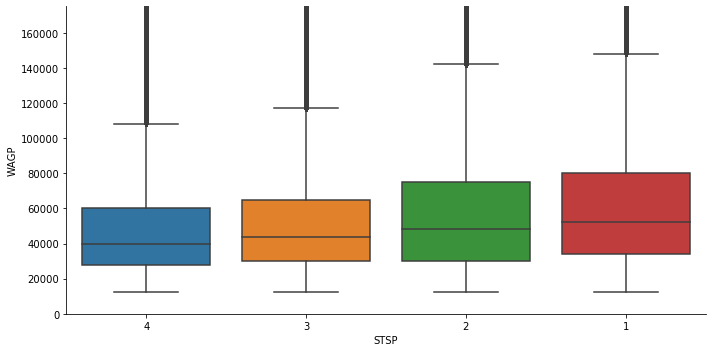

In [298]:
g = sns.catplot(y="WAGP", x="STSP", data=state_test, kind="box", aspect = 2, order = state_list)
g.set(ylim=(0, 175000))

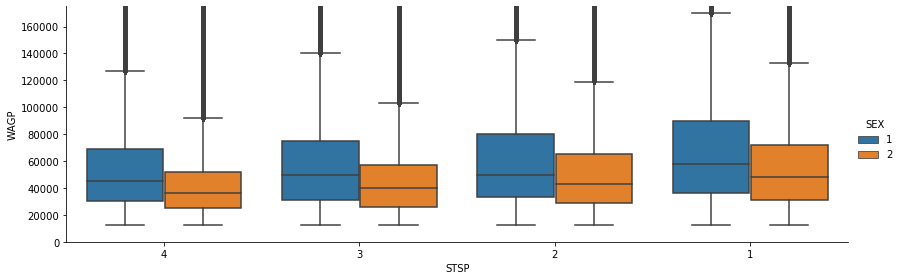

In [299]:
g = sns.catplot(y="WAGP", x="STSP", data=state_test, kind="box", height = 4, aspect = 3, hue = "SEX", order = state_list)
g.set(ylim=(0, 175000))

#### Ethnicity - RAC1P

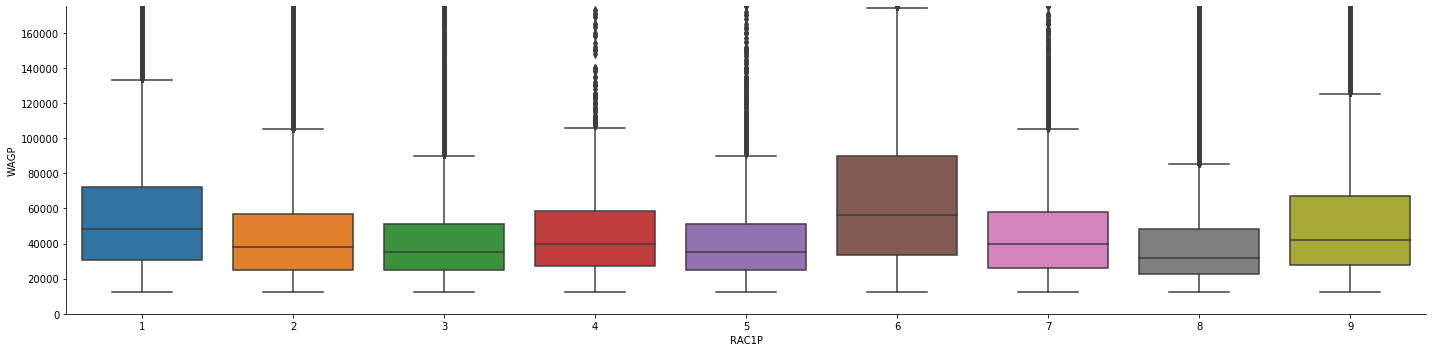

In [300]:
g = sns.catplot(y="WAGP", x="RAC1P", data=state_test, kind="box", aspect = 4)
g.set(ylim=(0, 175000))

In [301]:
state_test['RAC1P'].value_counts()

1    5274760
2     608751
6     377354
8     241495
9     135744
3      46464
7      11223
5       7444
4       2334
Name: RAC1P, dtype: int64

In [302]:
def int_race_split(df):
    # split into occupational industries
    df['RACE'] = df['RAC3P'].map(lambda y: "WHT" if y == 1
                               else "BLK" if y == 2
                               else "IND" if y == 3
                               else "ASN" if y <= 10
                               else "ISL" if y <= 14
                               else "NAN" if y == 15
                               else "WHT" if y <= 29
                               else "BLK" if y <= 38
                               else "IND" if y <= 41
                               else "ASN" if y <= 58
                               else "ISL" if y == 59
                               else "WHT" if y <= 70
                               else "ASN" if y == 71
                               else "WHT" if y <= 73
                               else "BLK" if y <= 75
                               else "ASN" if y <= 77
                               else "WHT" if y <= 89
                               else "BLK" if y <= 91
                               else "ASN" if y <= 98
                               else "ISL" if y == 99
                               else "WHT" if y == 100
                               else "UN")
    return df

In [303]:
int_race_test = state_test.copy()
int_race_test = int_race_split(int_race_test)
print("RACE :", int_race_test.RACE.unique())

RACE : ['WHT' 'IND' 'ASN' 'BLK' 'NAN' 'ISL']


In [304]:
int_race_test['RACE'].value_counts()

WHT    5387853
BLK     619592
ASN     386599
NAN     241495
IND      58252
ISL      11778
Name: RACE, dtype: int64

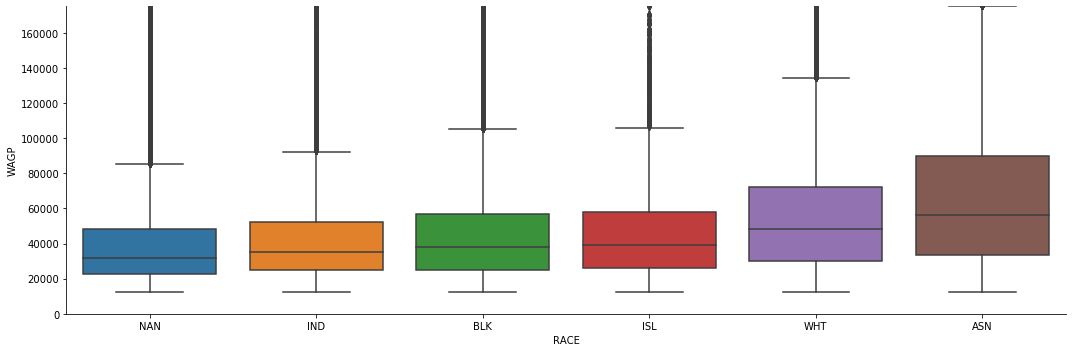

In [305]:
int_race_sort = int_race_test.groupby('RACE').median().sort_values(by=['WAGP']).reset_index()
int_race_list = int_race_sort['RACE'].tolist()
g = sns.catplot(y="WAGP", x="RACE", data=int_race_test, kind="box", aspect = 3, order = int_race_list)
g.set(ylim=(0, 175000))

In [306]:
def race_split(df):
    # split into occupational industries
    df['RACE'] = df['RAC3P'].map(lambda y: "WHT" if y == 1
                               else "BLK" if y == 2
                               else "IND" if y == 3
                               else "ASN" if y <= 10
                               else "ISL" if y <= 14
                               else "NAN" if y == 15
                               else "WHT" if y <= 29
                               else "BLK" if y <= 38
                               else "IND" if y <= 41
                               else "ASN" if y <= 58
                               else "ISL" if y == 59
                               else "WHT" if y <= 70
                               else "ASN" if y == 71
                               else "WHT" if y <= 73
                               else "BLK" if y <= 75
                               else "ASN" if y <= 77
                               else "WHT" if y <= 89
                               else "BLK" if y <= 91
                               else "ASN" if y <= 98
                               else "ISL" if y == 99
                               else "WHT" if y == 100
                               else "UN")
    df['RACE'] = df['RACE'].map(lambda y: 2 if y in ['WHT'] #white
                               else 3 if y in ['BLK','NAN','IND','ISL'] #black
                               else 1 if y in ['ASN'] #asian
                               else 4) #Other
    return df

In [307]:
race_test = state_test.copy()
race_test = race_split(race_test)
print("RACE :", race_test.RACE.unique())

RACE : [2 3 1]


In [308]:
race_test['RACE'].value_counts()

2    5387853
3     931117
1     386599
Name: RACE, dtype: int64

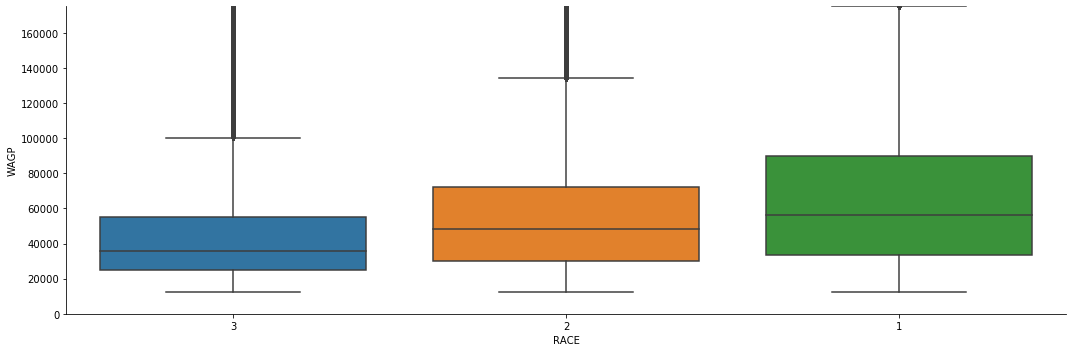

In [309]:
race_sort = race_test.groupby('RACE').median().sort_values(by=['WAGP']).reset_index()
race_list = race_sort['RACE'].tolist()
g = sns.catplot(y="WAGP", x="RACE", data=race_test, kind="box", aspect = 3, order = race_list)
g.set(ylim=(0, 175000))

#### Remove Columns

In [310]:
race_test.columns

Index(['ST', 'AGEP', 'SCHL', 'SEX', 'WAGP', 'WKHP', 'WKW', 'OCCP', 'POWSP',
       'RAC1P', 'RAC3P', 'AGEB', 'EDU', 'JOB', 'STSP', 'RACE'],
      dtype='object')

In [311]:
race_test.describe(include='all')

,ST,AGEP,SCHL,SEX,WAGP,WKHP,WKW,OCCP,POWSP,RAC1P,RAC3P,AGEB,EDU,JOB,STSP,RACE
count,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6705569.0,6705569.0,6.705569e+06,6.501202e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06
mean,2.799466e+01,4.386132e+01,1.880166e+01,1.443757e+00,5.568370e+04,1.0,1.0,4.087970e+03,2.812303e+01,1.815588e+00,2.562137e+00,3.191098e+00,2.265805e+00,2.871115e+00,2.475574e+00,2.081204e+00
std,1.598225e+01,1.247871e+01,3.190605e+00,4.968267e-01,3.545906e+04,0.0,0.0,2.749989e+03,1.765068e+01,2.000401e+00,5.928291e+00,1.119307e+00,1.114455e+00,1.638497e+00,1.133831e+00,4.357943e-01
min,1.000000e+00,1.800000e+01,1.000000e+00,1.000000e+00,1.250000e+04,1.0,1.0,1.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.200000e+01,3.300000e+01,1.600000e+01,1.000000e+00,3.000000e+04,1.0,1.0,1.760000e+03,1.200000e+01,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
50%,2.800000e+01,4.400000e+01,1.900000e+01,1.000000e+00,4.600000e+04,1.0,1.0,4.110000e+03,2.800000e+01,1.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
75%,4.200000e+01,5.400000e+01,2.100000e+01,2.000000e+00,7.000000e+04,1.0,1.0,5.810000e+03,4.200000e+01,1.000000e+00,1.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,2.000000e+00
max,5.600000e+01,7.000000e+01,2.400000e+01,2.000000e+00,2.020000e+05,1.0,1.0,9.830000e+03,5.550000e+02,9.000000e+00,1.000000e+02,5.000000e+00,5.000000e+00,5.000000e+00,4.000000e+00,3.000000e+00


In [314]:
def remove_col(df):
    remove_cols = ['SCHL','WKHP','WKW','OCCP','POWSP','RAC1P','RAC3P','AGEP','ST']
    df = df.drop(remove_cols,axis=1)
    return df

In [315]:
remove_test = race_test.copy()
remove_test = remove_col(remove_test)
remove_test.describe(include='all')

,SEX,WAGP,AGEB,EDU,JOB,STSP,RACE
count,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06
mean,1.443757e+00,5.568370e+04,3.191098e+00,2.265805e+00,2.871115e+00,2.475574e+00,2.081204e+00
std,4.968267e-01,3.545906e+04,1.119307e+00,1.114455e+00,1.638497e+00,1.133831e+00,4.357943e-01
min,1.000000e+00,1.250000e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,3.000000e+04,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
50%,1.000000e+00,4.600000e+04,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
75%,2.000000e+00,7.000000e+04,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,2.000000e+00
max,2.000000e+00,2.020000e+05,5.000000e+00,5.000000e+00,5.000000e+00,4.000000e+00,3.000000e+00


### OHE Columns

In [342]:
def OHE_cat(df):
    OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    cat_col = [i for i in df.columns.tolist() if i not in ['WAGP']]
    OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(df[cat_col]))
    OH_cols_train.index = df.index
    df = pd.concat([df, OH_cols_train], axis=1)
    df.drop(cat_col, axis=1, inplace=True)
    return df

In [343]:
OHE_test = remove_test.copy()
OHE_test = OHE_cat(OHE_test)
OHE_test.describe(include='all')

,WAGP,0,1,2,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,21,22
count,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,...,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06
mean,5.568370e+04,5.562432e-01,4.437568e-01,7.671668e-02,2.234328e-01,2.274371e-01,3.768623e-01,9.555118e-02,3.017617e-01,3.139197e-01,...,2.123514e-01,2.205543e-01,2.492752e-01,2.704322e-01,2.312138e-01,2.507013e-01,2.476527e-01,5.765342e-02,8.034893e-01,1.388573e-01
std,3.545906e+04,4.968267e-01,4.968267e-01,2.661414e-01,4.165460e-01,4.191771e-01,4.846000e-01,2.939748e-01,4.590225e-01,4.640842e-01,...,4.089723e-01,4.146205e-01,4.325935e-01,4.441831e-01,4.216088e-01,4.334169e-01,4.316490e-01,2.330869e-01,3.973591e-01,3.457976e-01
min,1.250000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,4.600000e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,7.000000e+04,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,2.020000e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [344]:
OHE_names = remove_test.copy()
OH_encoder2 = OneHotEncoder(handle_unknown='ignore', sparse=False)
cat_col2 = [i for i in OHE_names.columns.tolist() if i not in ['WAGP']]
OH_cols_train2 = pd.DataFrame(OH_encoder2.fit_transform(OHE_names[cat_col2]))

OHEcol2 = OH_encoder2.get_feature_names(cat_col2)
OHEcols2 = pd.DataFrame()
OHEcols2['Features'] = OHEcol2

OHEcols2

,Features
0,SEX_1
1,SEX_2
2,AGEB_1
3,AGEB_2
4,AGEB_3
5,AGEB_4
6,AGEB_5
7,EDU_1
8,EDU_2
9,EDU_3


### Pipeline

In [367]:
def pp_pipeline(df):
    df = (df
          .pipe(full_time_detect)
          .pipe(outlier_remove)
          .pipe(age_bins)
          .pipe(edu_split)
          .pipe(occ_split)
          .pipe(state_split)
          .pipe(race_split)
          .pipe(remove_col)
          #.pipe(OHE_cat)
         )
    return df

In [368]:
start_time = time.time()
pp_test = PUS_full.copy()
pp_test = pp_pipeline(pp_test)
print(" %s min" % round(((time.time() - start_time)/60),2))
pp_test.describe(include='all')

 1.26 min


,SEX,WAGP,AGEB,EDU,JOB,STSP,RACE
count,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06,6.705569e+06
mean,1.443757e+00,5.568370e+04,3.191098e+00,2.265805e+00,2.871115e+00,2.475574e+00,2.081204e+00
std,4.968267e-01,3.545906e+04,1.119307e+00,1.114455e+00,1.638497e+00,1.133831e+00,4.357943e-01
min,1.000000e+00,1.250000e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,3.000000e+04,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
50%,1.000000e+00,4.600000e+04,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
75%,2.000000e+00,7.000000e+04,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,2.000000e+00
max,2.000000e+00,2.020000e+05,5.000000e+00,5.000000e+00,5.000000e+00,4.000000e+00,3.000000e+00


## MODELING

In [369]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectFromModel

In [391]:
cv_split = pp_test.copy()
cv_split.shape
param_split= cv_split.sample(frac=0.025)
param_split.shape

(167639, 7)

In [392]:
param_y = param_split['WAGP']
param_x = param_split.drop(['WAGP'], axis=1)

In [393]:
kfold = StratifiedKFold(n_splits=3)

RFR = RandomForestRegressor()
rfr_param_grid = {'n_estimators': [50,100],
                  'min_samples_split': [5,10],
                  'min_samples_leaf': [10,20]}

gsRFR = GridSearchCV(RFR, param_grid=rfr_param_grid, cv=kfold,
                     scoring="neg_mean_absolute_error", verbose=1, n_jobs=4)

gsRFR.fit(param_x, param_y)

RFR_best = gsRFR.best_estimator_

gsRFR.best_score_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:  1.5min finished


-20144.70170046946

In [394]:
RFR_best

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [395]:
fit_split= cv_split.sample(frac=0.1)
fit_split.shape

(670557, 7)

In [396]:
y_full = fit_split['WAGP']
X_full = fit_split.drop(['WAGP'], axis=1)

In [397]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_full, y_full, random_state=0)

In [398]:
start_time = time.time()
RFR_best.fit(X_train, y_train)
pred_valid = RFR_best.predict(X_valid)
print("MAE : ", mean_absolute_error(y_valid, pred_valid))
print(" %s min" % round(((time.time() - start_time)/60),2))

MAE :  20008.768771414052
 1.26 min


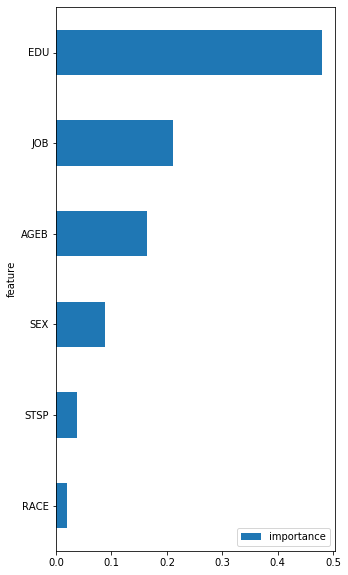

In [399]:
features = pd.DataFrame()
features['feature'] = X_full.columns
features['importance'] = RFR_best.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(5, 10))

## ANALYSIS

In [400]:
def get_score(df): 
    y_5 = df['WAGP']
    x_5 = df.drop(['WAGP'], axis =1)

    preds_test = RFR_best.predict(x_5).astype(int)
    output = pd.DataFrame({'Index': x_5.index, 'WAG_pred': preds_test}).set_index('Index')

    result = pd.concat([output, df], axis=1, sort=False)

    m_output = result[result['SEX'] == 1]
    f_output = result[result['SEX'] == 2]

    m_group = m_output.groupby(['SEX', 'EDU', 'JOB', 'STSP','RACE','AGEB'])
    m_count = m_group.count().reset_index()
    m_median = m_group.median().reset_index()

    f_group = f_output.groupby(['SEX', 'EDU', 'JOB', 'STSP','RACE','AGEB'])
    f_count = f_group.count().reset_index()
    f_median = f_group.median().reset_index()

    final_df = pd.DataFrame({'m_WAG_prd': m_median.WAG_pred, 'm_WAG_hrd': m_median.WAGP, 'm_CT': m_count.WAG_pred,
                             'f_WAG_prd': f_median.WAG_pred, 'f_WAG_hrd': f_median.WAGP, 'f_CT': f_count.WAG_pred})

    final_df = final_df.dropna()
    final_df = final_df.loc[final_df.m_CT >= 150].copy()
    final_df = final_df.loc[final_df.f_CT >= 150].copy()

    final_df['t_CT'] = final_df['m_CT'] + final_df['f_CT']
    final_df['weight'] = final_df['t_CT'] / final_df['t_CT'].sum()

    final_df['f_m_hrd'] = final_df['f_WAG_hrd']/final_df['m_WAG_hrd']
    final_df['value_hrd'] = final_df['f_m_hrd'] * final_df['weight']

    final_df['f_m_prd'] = final_df['f_WAG_prd']/final_df['m_WAG_prd']
    final_df['value_prd'] = final_df['f_m_prd'] * final_df['weight']

    hrd_ratio = round(final_df['value_hrd'].sum()*100,1)
    prd_ratio = round(final_df['value_prd'].sum()*100,1)
    
    ratios = [hrd_ratio,prd_ratio]
    
    return ratios

In [401]:
score = get_score(cv_split)
score

[77.0, 77.5]

In [445]:
years = list(range(2012, 2019))
ratio_list = []
for year in years:
    useful_cols = ['WAGP','SEX', 'AGEP','RAC1P','RAC3P','SCHL', 'WKW','WKHP','OCCP','POWSP','ST']
    path = ('data/%s' % year)
    temp = pd.concat([pd.read_csv(f, usecols = useful_cols) for f in glob.glob(path + "/*.csv")], ignore_index=True)
    score = get_score(pp_pipeline(temp))
    ratio_list.append(score)
    print("Completed :", year, " Ratio: ", score)

Completed : 2012
Completed : 2013
Completed : 2014
Completed : 2015
Completed : 2016
Completed : 2017
Completed : 2018


In [457]:
scores = pd.DataFrame(ratio_list, columns=['Hard_Ratio','Pred_Ratio'])
scores['Year'] = years
scores

,Hard_Ratio,Pred_Ratio,Year
0,89.1,88.6,2012
1,81.1,80.9,2013
2,76.0,76.4,2014
3,84.6,84.7,2015
4,86.8,86.7,2016
5,81.7,82.2,2017
6,84.1,84.6,2018


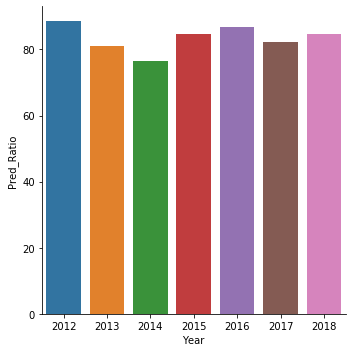

In [458]:
g = sns.catplot(y="Pred_Ratio", x="Year", data=scores, kind="bar")

In [404]:
y_5 = cv_split['WAGP']
x_5 = cv_split.drop(['WAGP'], axis =1)


preds_test = RFR_best.predict(x_5).astype(int)
output = pd.DataFrame({'Index': x_5.index, 'WAG_pred': preds_test}).set_index('Index')

result = pd.concat([output, cv_split], axis=1, sort=False)

m_output = result[result['SEX'] == 1]
f_output = result[result['SEX'] == 2]

m_group = m_output.groupby(['SEX', 'EDU', 'JOB', 'STSP','AGEB']) #,'RACE'
m_count = m_group.count().reset_index()
m_median = m_group.median().reset_index()

f_group = f_output.groupby(['SEX', 'EDU', 'JOB', 'STSP','AGEB']) #,'RACE'
f_count = f_group.count().reset_index()
f_median = f_group.median().reset_index()

final_df = pd.DataFrame({'m_WAG_prd': m_median.WAG_pred, 'm_WAG_hrd': m_median.WAGP, 'm_CT': m_count.WAG_pred,
                         'f_WAG_prd': f_median.WAG_pred, 'f_WAG_hrd': f_median.WAGP, 'f_CT': f_count.WAG_pred})

final_df = final_df.dropna()
#final_df = final_df.loc[final_df.m_CT >= 500].copy()
#final_df = final_df.loc[final_df.f_CT >= 500].copy()

final_df['t_CT'] = final_df['m_CT'] + final_df['f_CT']
final_df['weight'] = final_df['t_CT'] / final_df['t_CT'].sum()

final_df['f_m_hrd'] = final_df['f_WAG_hrd']/final_df['m_WAG_hrd']
final_df['value_hrd'] = final_df['f_m_hrd'] * final_df['weight']

final_df['f_m_prd'] = final_df['f_WAG_prd']/final_df['m_WAG_prd']
final_df['value_prd'] = final_df['f_m_prd'] * final_df['weight']

print("Weight Check: ", round(final_df['weight'].sum()),7)
print("Hard Ratio: %s %%" % round(final_df['value_hrd'].sum()*100,1))
print("Pred Ratio: %s %%" % round(final_df['value_prd'].sum()*100,1))
final_df.describe()

Hard Ratio: 77.3 %
Pred Ratio: 77.6 %


,m_WAG_prd,m_WAG_hrd,m_CT,f_WAG_prd,f_WAG_hrd,f_CT,t_CT,weight,f_m_hrd,value_hrd,f_m_prd,value_prd
count,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1.196000e+03,1196.000000,1.196000e+03
mean,59828.688963,52636.496656,3118.668060,50243.180602,44078.135452,2487.960702,5606.628763,0.000836,0.859375,6.465154e-04,0.845050,6.489071e-04
std,21872.673765,21709.842540,5967.144225,19414.659243,18701.551761,4745.625132,10066.170755,0.001501,0.219431,1.099618e-03,0.122623,1.112117e-03
min,23983.000000,20000.000000,1.000000,21106.000000,15000.000000,1.000000,7.000000,0.000001,0.266667,6.033295e-07,0.528458,8.627095e-07
25%,43478.750000,36000.000000,162.000000,35041.250000,30000.000000,138.750000,311.000000,0.000046,0.752365,4.247188e-05,0.757725,4.053150e-05
50%,56729.500000,49150.000000,674.500000,45579.500000,40000.000000,585.000000,1337.000000,0.000199,0.844444,1.774852e-04,0.837800,1.783541e-04
75%,74211.500000,63625.000000,3181.250000,61172.000000,52000.000000,2579.750000,5948.500000,0.000887,0.920447,7.152121e-04,0.918342,7.178134e-04
max,134509.000000,122000.000000,53601.000000,111259.000000,115000.000000,35983.000000,78029.000000,0.011637,2.788845,8.543757e-03,1.581925,8.797916e-03


[(0, 1000)]

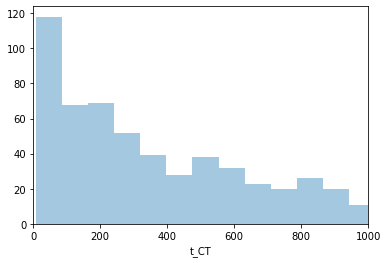

In [406]:
g = sns.distplot(final_df["t_CT"], bins=1000, kde=False)
g.set(xlim=(0, 1000))

In [ ]:
x_5.shape